> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: The Movie Database Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



### Dataset Description 

> **Tip**: In this Database I will be analyzing Data asssociated with Movie Dataset of over 100,000 records. With this Dataset I will be answering questions listed below.
 


 

1.Which year was the highest Revenue Generated?

2.The Sum of Revenues genrated by each Genres?

3.What kinds of properties are associated with movies that have high revenues?


In [1]:
# Use this cell to set up import statements for all of the packages that you
# Import pandas

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Load movie data

df_movies = pd.read_csv('tmdb-movies.csv')

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


## Data Wrangling

In [2]:
#checking the first 7 rows for Movies Dataset to understand the data
#genres column has Five(5) genres in a row
df_movies.head(7)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08


In [3]:
#checking for the number of columns and rows
df_movies.shape

(10866, 21)

In [4]:
#checking for datatypes and missing values
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
#checking for meaningful information about the Data
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [6]:
#I notice that cast, homepage , director, tagline , keywords , overview, production_companies won't be needed for my analysis
#This column won't be needed to answer questions as stated

df_movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [8]:
#Selecting Numerical Data(columns) that will be analyzed to answer questions

cols = ['genres', 'popularity','budget','revenue', 'release_date','vote_count', 'budget_adj','revenue_adj', 'vote_average']
df_movies = df_movies[cols]
df_movies.head(5)

#Notice genres has values as STRING seperated with Pipe(|), which needs to be seperated.

,genres,popularity,budget,revenue,release_date,vote_count,budget_adj,revenue_adj,vote_average
0,Action|Adventure|Science Fiction|Thriller,32.985763,150000000,1513528810,6/9/15,5562,1.379999e+08,1.392446e+09,6.5
1,Action|Adventure|Science Fiction|Thriller,28.419936,150000000,378436354,5/13/15,6185,1.379999e+08,3.481613e+08,7.1
2,Adventure|Science Fiction|Thriller,13.112507,110000000,295238201,3/18/15,2480,1.012000e+08,2.716190e+08,6.3
3,Action|Adventure|Science Fiction|Fantasy,11.173104,200000000,2068178225,12/15/15,5292,1.839999e+08,1.902723e+09,7.5
4,Action|Crime|Thriller,9.335014,190000000,1506249360,4/1/15,2947,1.747999e+08,1.385749e+09,7.3


In [9]:
# checking for missing data
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        10843 non-null  object 
 1   popularity    10866 non-null  float64
 2   budget        10866 non-null  int64  
 3   revenue       10866 non-null  int64  
 4   release_date  10866 non-null  object 
 5   vote_count    10866 non-null  int64  
 6   budget_adj    10866 non-null  float64
 7   revenue_adj   10866 non-null  float64
 8   vote_average  10866 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 764.1+ KB


In [10]:
#WI need to drop the rows with null values in genres column
df_movies = df_movies.dropna(subset=['genres'])

In [11]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        10843 non-null  object 
 1   popularity    10843 non-null  float64
 2   budget        10843 non-null  int64  
 3   revenue       10843 non-null  int64  
 4   release_date  10843 non-null  object 
 5   vote_count    10843 non-null  int64  
 6   budget_adj    10843 non-null  float64
 7   revenue_adj   10843 non-null  float64
 8   vote_average  10843 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 847.1+ KB


In [12]:
#I noticed earlier that genres has values as STRING seperated with pipe(|)
df_movies.genres[0]

'Action|Adventure|Science Fiction|Thriller'

In [13]:
#I want to split the genres and choose 'Action' as a value for each row that has action.
#splitting the STRING and performing the explode() will cause duplicates in my Dataset so I won't be using the explode().
df_movies['genres'] = df_movies['genres'].apply(lambda x : x.split('|')[0])

In [14]:
df_movies.genres

0             Action
1             Action
2          Adventure
3             Action
4             Action
            ...     
10861    Documentary
10862         Action
10863        Mystery
10864         Action
10865         Horror
Name: genres, Length: 10843, dtype: object

In [15]:
#inspecting the dataframe
df_movies.head(10)

,genres,popularity,budget,revenue,release_date,vote_count,budget_adj,revenue_adj,vote_average
0,Action,32.985763,150000000,1513528810,6/9/15,5562,1.379999e+08,1.392446e+09,6.5
1,Action,28.419936,150000000,378436354,5/13/15,6185,1.379999e+08,3.481613e+08,7.1
2,Adventure,13.112507,110000000,295238201,3/18/15,2480,1.012000e+08,2.716190e+08,6.3
3,Action,11.173104,200000000,2068178225,12/15/15,5292,1.839999e+08,1.902723e+09,7.5
4,Action,9.335014,190000000,1506249360,4/1/15,2947,1.747999e+08,1.385749e+09,7.3
5,Western,9.110700,135000000,532950503,12/25/15,3929,1.241999e+08,4.903142e+08,7.2
6,Science Fiction,8.654359,155000000,440603537,6/23/15,2598,1.425999e+08,4.053551e+08,5.8
7,Drama,7.667400,108000000,595380321,9/30/15,4572,9.935996e+07,5.477497e+08,7.6
8,Family,7.404165,74000000,1156730962,6/17/15,2893,6.807997e+07,1.064192e+09,6.5
9,Comedy,6.326804,175000000,853708609,6/9/15,3935,1.609999e+08,7.854116e+08,8.0


In [16]:
#release_date is an Object type and needs to be change to datetime datatype
#I will create another column 'Year' so I can form another column bearing Year for our analysis
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])
df_movies['year'] = df_movies['release_date'].dt.year

<a id='eda'></a>
## Exploratory Data Analysis


> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1  (Which Year generated the Highest Revenue?)

Text(0, 0.5, 'Revenue Generated')

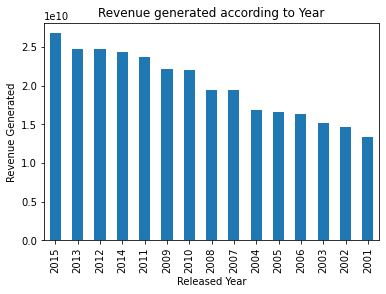

In [17]:
#Which year was the highest Revenue Generated
df_movies.groupby('year')['revenue'].sum().sort_values(ascending = False)[:15].plot(kind = 'bar')
plt.title('Revenue generated according to Year')
plt.xlabel('Released Year')
plt.ylabel('Revenue Generated')

### ANSWER : YEAR 2015 marks the YEAR with highest Revenue as seen in the BAR CHART above.

### Research Question 2  (The sum of revenues generated by different genres?)

In [18]:
#The SUM of Revenue generated by different genres
df_movies.groupby('genres')['revenue'].sum()

genres
Action             96606072845
Adventure          73107006764
Animation          28797048213
Comedy             67952461496
Crime              12706767478
Documentary          852211592
Drama              61678301024
Family              8854452778
Fantasy            18303948327
Foreign                      0
History             1951867180
Horror             15432626119
Music               2304615926
Mystery             3019881629
Romance             7046888501
Science Fiction    17046401611
TV Movie              42000000
Thriller           13003269735
War                 2708551908
Western             1305819749
Name: revenue, dtype: int64

### ANSWER : The Genre 'Action' generated the highest Revenue.

### Research Question 3 (What kind of properties are associated with movies that have high revenues?)

In [19]:
#Here Let look for the correlation in the Movie data frame.
df_movies.corr(method ='pearson')

,popularity,budget,revenue,vote_count,budget_adj,revenue_adj,vote_average,year
popularity,1.000000,0.545263,0.663266,0.800786,0.513306,0.608962,0.210426,0.012030
budget,0.545263,1.000000,0.734824,0.632585,0.968949,0.622379,0.081676,-0.016652
revenue,0.663266,0.734824,1.000000,0.791123,0.706341,0.919089,0.173277,-0.023680
vote_count,0.800786,0.632585,0.791123,1.000000,0.586913,0.707865,0.254703,0.019273
budget_adj,0.513306,0.968949,0.706341,0.586913,1.000000,0.646488,0.093771,-0.035603
revenue_adj,0.608962,0.622379,0.919089,0.707865,0.646488,1.000000,0.193859,-0.042735
vote_average,0.210426,0.081676,0.173277,0.254703,0.093771,0.193859,1.000000,-0.006878
year,0.012030,-0.016652,-0.023680,0.019273,-0.035603,-0.042735,-0.006878,1.000000


In [20]:
#There is a strong correlation/relationship between Revenue and (revenue_adj,vote_count,budget )
cor_df_movies = df_movies.corr()
cor_df_movies['revenue'].sort_values(ascending=False)

revenue         1.000000
revenue_adj     0.919089
vote_count      0.791123
budget          0.734824
budget_adj      0.706341
popularity      0.663266
vote_average    0.173277
year           -0.023680
Name: revenue, dtype: float64

In [21]:
#I want to use a scattered plot to also get relationships between Revenue and (revenue_adj , budget , vote_count)
#I want to define a function for scattered plot for reusability.
def scatter_plot(c, a, b):
    sns.regplot(x = df_movies[a],y = df_movies[b])
    plt.xlabel(a)
    plt.ylabel(b)
    plt.title(c)
    plt.show() 

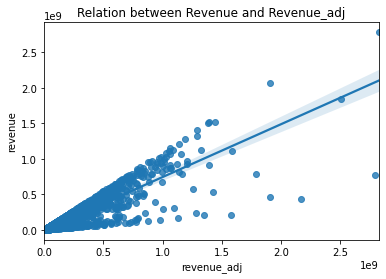

In [22]:
#Get the Relationship between Revenue and Revenue_adj
scatter_plot('Relation between Revenue and Revenue_adj','revenue_adj','revenue',)

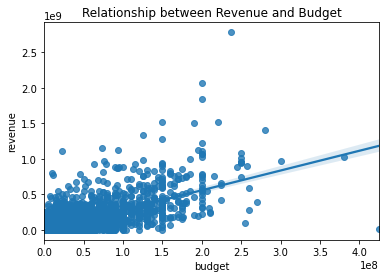

In [23]:
#Get the Relationship between Revenue and Budget 
scatter_plot('Relationship between Revenue and Budget','budget','revenue')

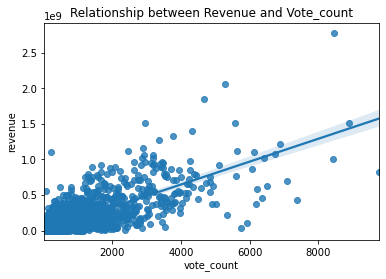

In [24]:
#Get the Relationship between Revenue and vote_count
scatter_plot('Relationship between Revenue and Vote_count','vote_count','revenue')

<a id='conclusions'></a>
## Conclusions

> I can  say that Movies with Higher Budget generate High Revenue.

> I can also say that Movies with high Revenue receives higher Vote Count, 

## Limitation
 The Key values in the Genres Column in the Dataset were not properly categorized to ascertaining better analysis, In avioding duplicates of STRING value seperated by Pipe(|)to other colums I made the choice of using a value for my analysis.  
 

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])